In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load main data set 
df = pd.read_csv('../Data/TCS_stock_history.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0


#  Performing EDA(Exploratory Data Analysis) in my main data set 

In [4]:
df.shape

(4463, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4463 entries, 0 to 4462
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          4463 non-null   object 
 1   Open          4463 non-null   float64
 2   High          4463 non-null   float64
 3   Low           4463 non-null   float64
 4   Close         4463 non-null   float64
 5   Volume        4463 non-null   int64  
 6   Dividends     4463 non-null   float64
 7   Stock Splits  4463 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 279.1+ KB


In [6]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,4463.000000,4463.000000,4463.000000,4463.000000,4.463000e+03,4463.000000,4463.000000
mean,866.936239,876.675013,856.653850,866.537398,3.537876e+06,0.071533,0.001344
std,829.905368,838.267104,821.233477,829.611313,3.273531e+06,0.965401,0.051842
min,24.146938,27.102587,24.146938,26.377609,0.000000e+00,0.000000,0.000000
25%,188.951782,191.571816,185.979417,188.594620,1.860959e+06,0.000000,0.000000
50%,530.907530,534.751639,525.616849,529.713257,2.757742e+06,0.000000,0.000000
75%,1156.462421,1165.815854,1143.622800,1154.784851,4.278625e+06,0.000000,0.000000
max,3930.000000,3981.750000,3892.100098,3954.550049,8.806715e+07,40.000000,2.000000


In [7]:
df.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
num_col = df.select_dtypes(['int', 'float'])

# Data cleaning

In [10]:
#  removing outliers using IQR method 
for col in num_col:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    median = df[col].median()
    outliers = (df[col] < lower_limit) | (df[col] > upper_limit)
    df.loc[outliers, col] = median


# Feature Engineering

In [11]:
#   Column date convert in date time forame 
df['Date'] = pd.to_datetime(df['Date'])  

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.day_name()

# Visualization

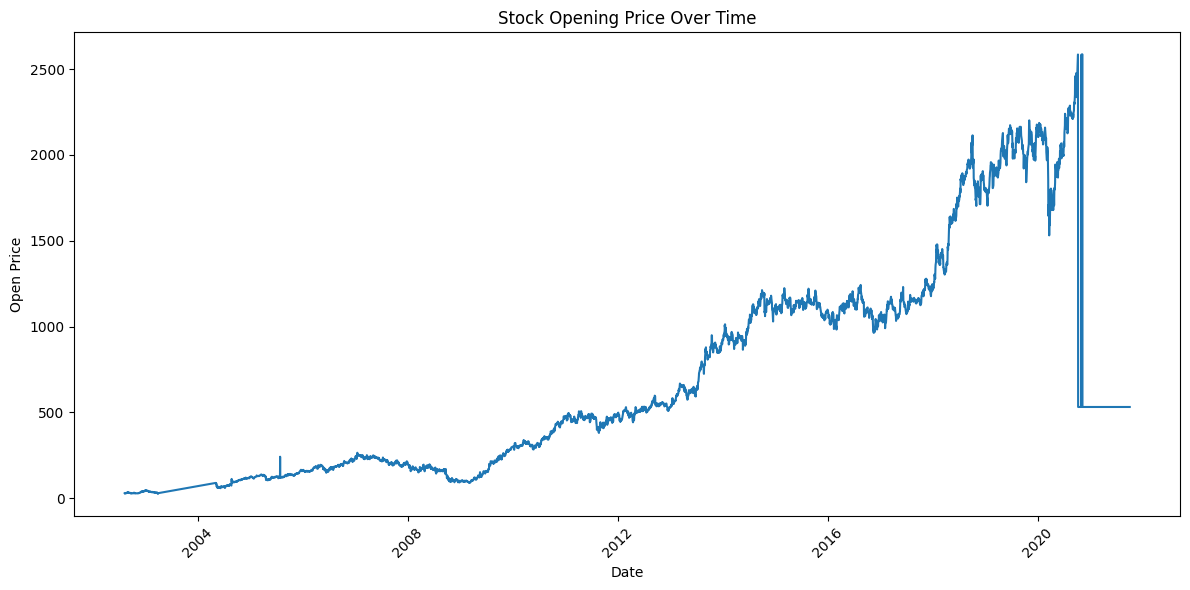

In [12]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='Open', data=df)
plt.title('Stock Opening Price Over Time')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

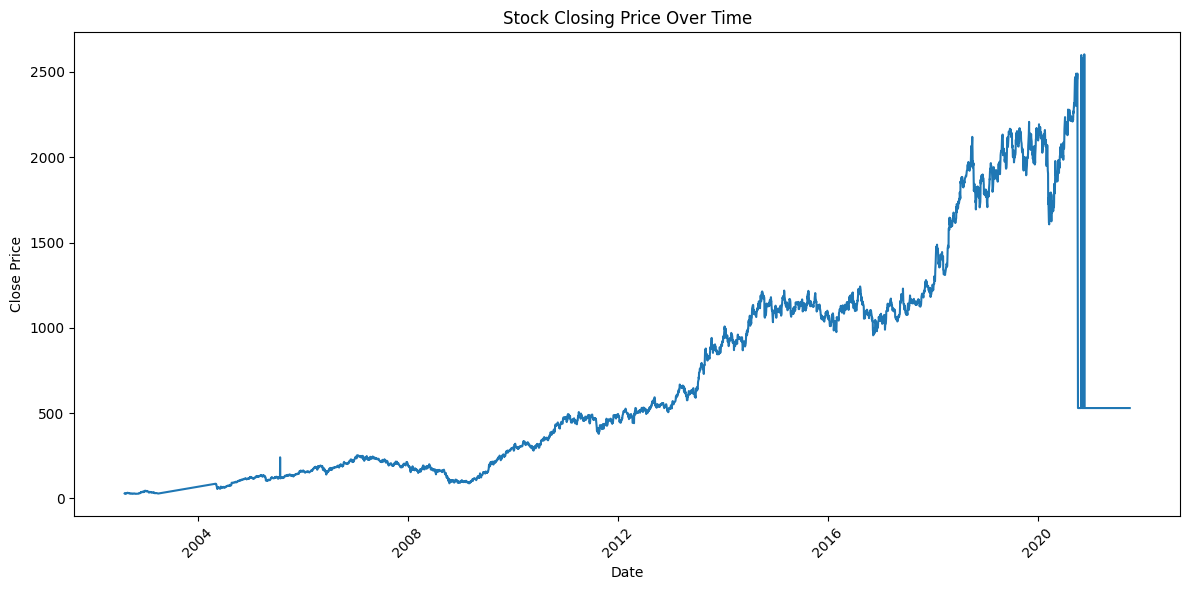

In [13]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='Close', data=df)
plt.title('Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


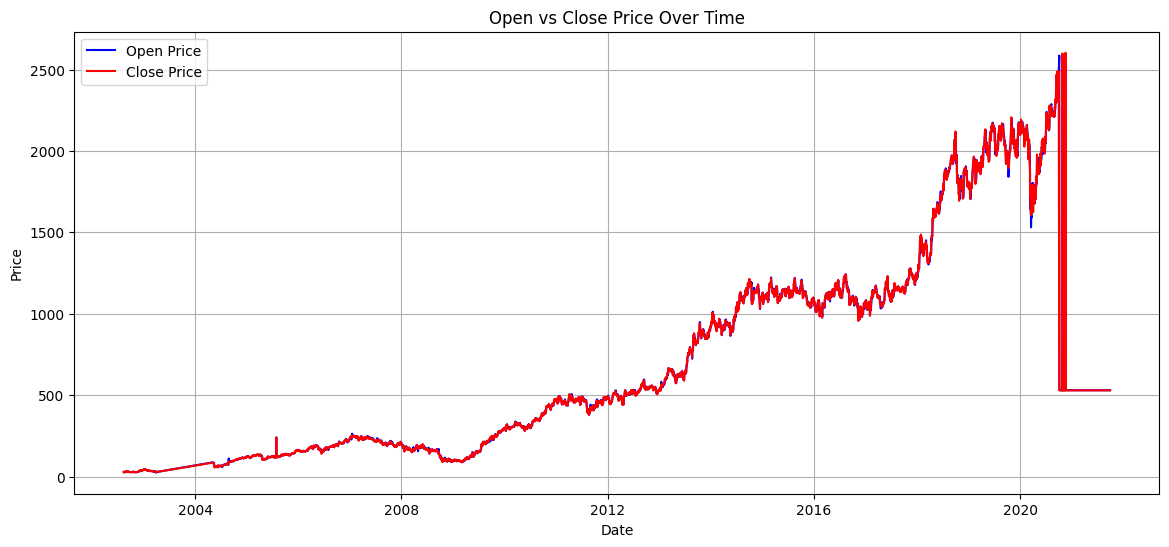

In [14]:
plt.figure(figsize=(14,6))
plt.plot(df['Date'], df['Open'], label='Open Price', color='blue')
plt.plot(df['Date'], df['Close'], label='Close Price', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Open vs Close Price Over Time')
plt.legend()
plt.grid(True)
plt.show()

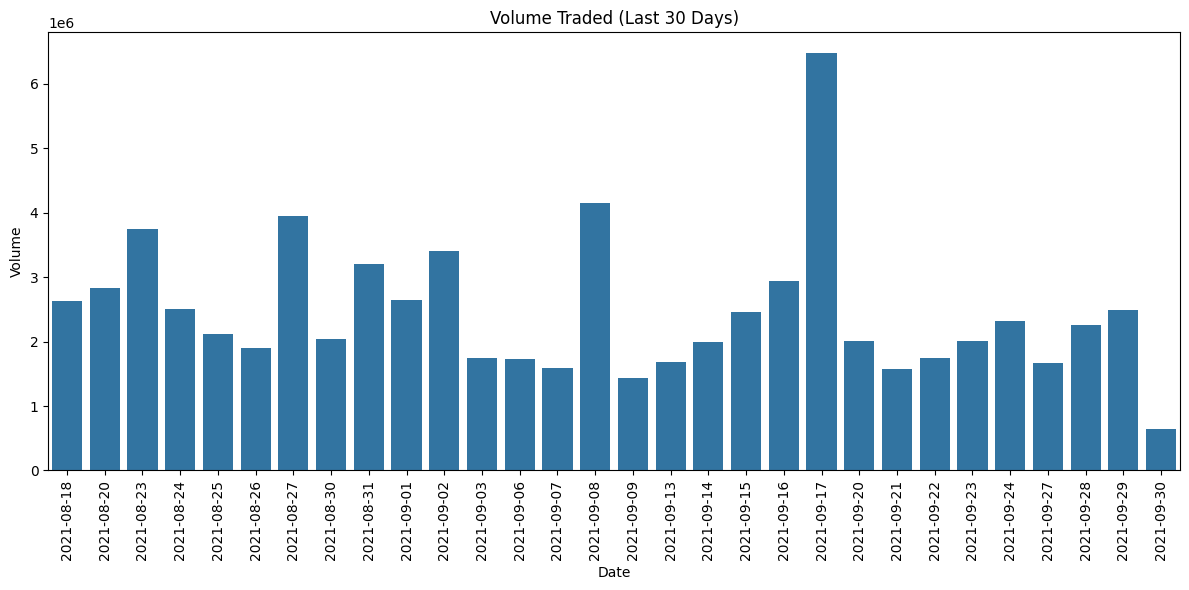

In [15]:
plt.figure(figsize=(12,6))
sns.barplot(x='Date', y='Volume', data=df.tail(30))
plt.title('Volume Traded (Last 30 Days)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


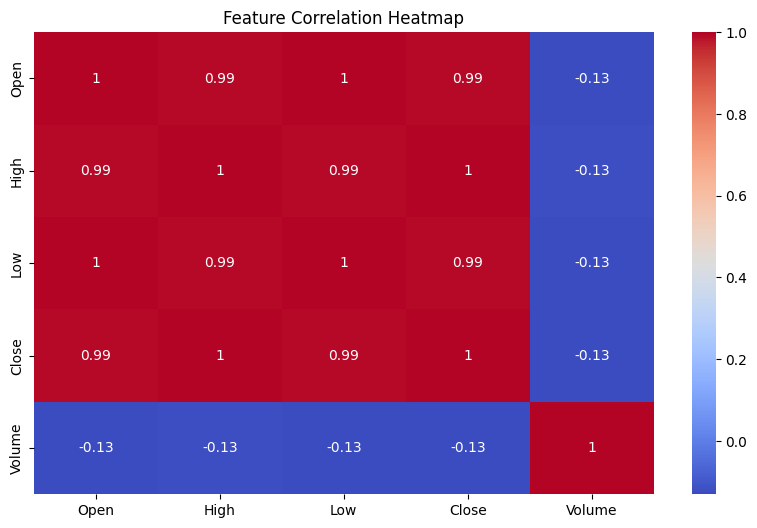

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(df[['Open', 'High', 'Low', 'Close', 'Volume']].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [17]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Month,Day,DayOfWeek
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0,2002,8,12,Monday
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0,2002,8,13,Tuesday
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0,2002,8,14,Wednesday
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0,2002,8,15,Thursday
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0,2002,8,16,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...
4458,2021-09-24,530.907530,534.751639,525.616849,529.713257,2320754,0.0,0.0,2021,9,24,Friday
4459,2021-09-27,530.907530,534.751639,525.616849,529.713257,1673362,0.0,0.0,2021,9,27,Monday
4460,2021-09-28,530.907530,534.751639,525.616849,529.713257,2253075,0.0,0.0,2021,9,28,Tuesday
4461,2021-09-29,530.907530,534.751639,525.616849,529.713257,2489161,0.0,0.0,2021,9,29,Wednesday


# Save my clean data set 

In [18]:
df = df.drop(['Date', 'Low', 'High', 'Dividends', 'Stock Splits', 'DayOfWeek'], axis= 1)

In [19]:
df.to_csv('Clean_2.csv', index = False)